#### - Sobhan Moradian Daghigh
#### 
#### - 1/20/2022
#### 
#### - PR - EX03 - Q6 - All Parts

In [195]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from skimage.util import view_as_blocks
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Using the glob for loading the datasets

In [30]:
def load_datas(folder_name):
    
    images = glob.glob('./inputs/P6/LFW/{}/*.jpg'.format(folder_name))

    x_dataset = []
    y_dataset = []
    images = glob.glob('./inputs/P6/LFW/{}/*.jpg'.format(folder_name))
    for image in images:
        if folder_name == 'train':
            label = image.split('\\')[1][:-7]
        else:
            label = image.split('\\')[1][:-4]

        img = np.array(Image.open(image)).reshape((1, 4800))

        x_dataset.append(img[0])
        y_dataset.append(label)               
            
    return x_dataset, y_dataset

In [32]:
x_train, y_train = load_datas('train')
x_test, y_test = load_datas('test')

### Part A.

In [127]:
def eigenfaces_train(trainset ,v):
    pca = PCA(n_components=v)
    pca.fit_transform(trainset)
    mean = pd.DataFrame(trainset).mean()
    return pca.components_, mean

In [128]:
# eigenfaces_train(x_train, 50)

In [129]:
W, mu = eigenfaces_train(x_train, 50)

In [130]:
W.shape

(50, 4800)

In [54]:
mu.shape

(4800,)

### Part B.

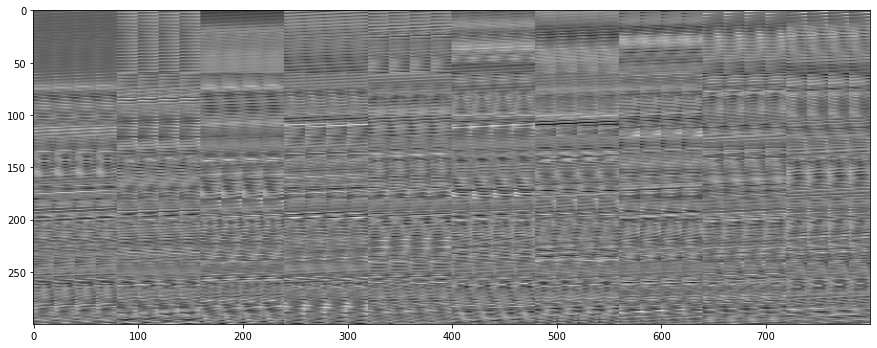

In [122]:
plt.figure(figsize=(15,15))
shapei, shapej = 60, 80
blank = np.zeros((300, 800))
indi, indj = 0, 0

for vec in W:
    vec = vec.reshape(shapei, shapej)
    if blank.shape[1] == indj:
        indi += shapei 
        indj = 0

    blank[indi: indi + shapei, indj: indj + shapej] = vec
    indj += shapej
        
plt.imshow(blank, cmap='gray')
plt.show()

### Part C.

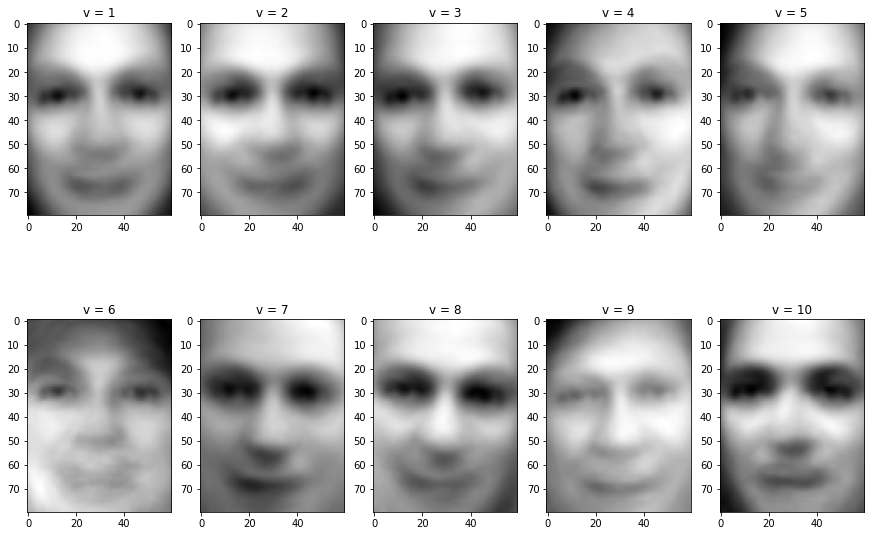

In [232]:
v = range(1, 11)
n_samples = 10
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
samples = random.choices(range(len(x_train)), k=n_samples)
    
for i, ax in enumerate(fig.axes):
    
    # Compress
    pca = PCA(n_components=v[i])
    reduced = pca.fit_transform(x_train)

    # Reconstruct
    reconstructed = pca.inverse_transform(reduced)
    
    recons = np.array(reconstructed[samples[i]]).reshape(80, 60)
    
    ax.imshow(recons, cmap='gray')
    ax.set_title('v = {}'.format(v[i]))
plt.show()

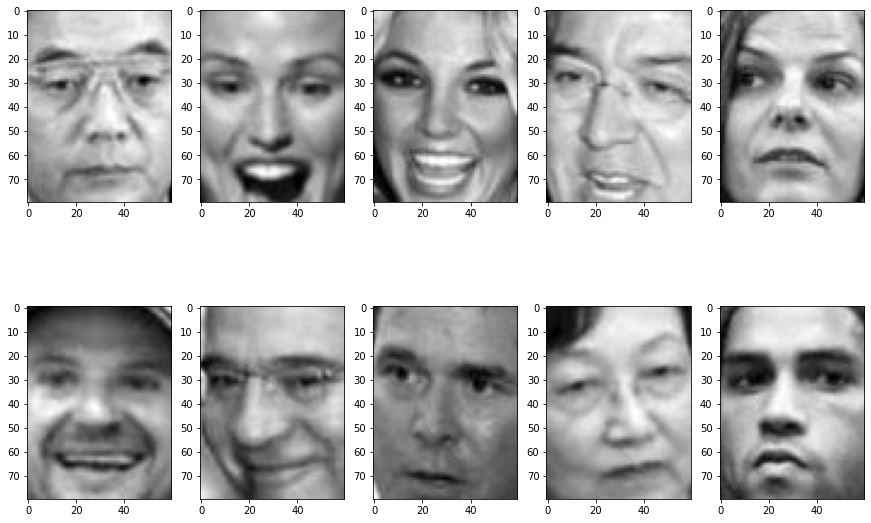

In [233]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
    
for i, ax in enumerate(fig.axes):
    org = np.array(x_train[samples[i]]).reshape(80, 60)
    ax.imshow(org, cmap='gray')
plt.show()

### Part D.

In [222]:
def eigenfaces_test(trainset, trainlabels, testset, W, mu, v):
    pca = PCA(n_components = v)
    pca.fit(trainset)

    train_pca = pca.transform(trainset)
    test_pca = pca.transform(testset)
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
    knn.fit(train_pca, trainlabels)
    return knn.predict(test_pca)

In [223]:
W, mu = eigenfaces_train(x_train, 50)
predictions = eigenfaces_test(x_train, y_train, x_test, W, mu, 50)

In [225]:
predictions

array(['Ann_Veneman', 'Andy_Roddick', 'Nicanor_Duarte_Frutos',
       'Yoriko_Kawaguchi', 'Jacques_Rogge', 'Roger_Federer',
       'Edmund_Stoiber', 'Britney_Spears', 'James_Blake', 'Charles_Moose',
       'Britney_Spears', 'Ari_Fleischer', 'Paul_Wolfowitz',
       'Dominique_de_Villepin', 'George_HW_Bush', 'Wen_Jiabao',
       'Harrison_Ford', 'Gonzalo_Sanchez_de_Lozada', 'David_Nalbandian',
       'Edmund_Stoiber', 'Ari_Fleischer', 'Pierce_Brosnan',
       'Kim_Ryong-sung', 'Howard_Dean', 'Gonzalo_Sanchez_de_Lozada',
       'Pierce_Brosnan', 'Walter_Mondale', 'John_Paul_II', 'Andy_Roddick',
       'Richard_Gephardt', 'Eduardo_Duhalde', 'Dominique_de_Villepin',
       'Jacques_Rogge', 'Jiri_Novak', 'Gonzalo_Sanchez_de_Lozada',
       'John_Allen_Muhammad', 'James_Kelly', 'Britney_Spears',
       'Richard_Gere', 'Kim_Clijsters', 'Pierce_Brosnan', 'Mike_Weir',
       'Kim_Clijsters', 'Mark_Philippoussis', 'Kim_Clijsters',
       'Michael_Jackson', 'Kim_Clijsters', 'Eduardo_Duhalde',
   